# Classification of Players' Positions

In this notebook, we will perform classification of players' positions using a cleaned dataset. We aim to classify players into five positions using six different classification models:

- DecisionTreeClassifier
- RandomForestClassifier
- GaussianNB
- KNeighborsClassifier
- LogisticRegression
- XGBoost

We have reset the positions to five, which will be the classes of our classification.



## Preprocessing

In this section, we use the cleaned data from a previous notebook and perform preprocessing on the attributes. We will explore the correlation between attributes and investigate their correlation with the target variable, which is 'club_position'.

### Correlation Analysis

In this section, we leverage the results obtained from the previous notebook, where we cleaned and examined the correlation between attributes of the dataset. 

### Correlation with Target

We will also analyze the correlation between attributes and the target variable ('club_position'). Understanding the correlation will help us identify key features that influence the players' positions.

Let's dive into the preprocessing steps and explore the data before moving on to the classification models.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import tree, naive_bayes



from xgboost import XGBClassifier


In [2]:
pd.set_option('display.max_columns', None) # set no limit for number of displayed columns.

In [3]:
df_cleaned = pd.read_csv('Fifa24PLayers_beforefss.csv')

In [4]:
df_cleaned.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,91,94,181500000.0,230000.0,24,182,75,73,16,1,1,7,1909,2024.0,18,1,4,5,5,9,349400000.0,97,90,80,92,36,78,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88,26,34,32,13,5,7,11,6,15,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,91,94,185000000.0,340000.0,22,195,94,10,13,1,1,9,448,2027.0,36,0,3,3,5,9,356100000.0,89,93,66,80,45,88,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87,38,47,29,7,14,13,11,7,15,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,91,91,103000000.0,350000.0,32,181,75,10,13,1,2,17,2945,2025.0,7,1,5,4,5,9,190600000.0,72,88,94,87,65,78,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88,66,70,53,15,13,5,10,13,15,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,90,90,41000000.0,23000.0,36,169,67,112893,39,1,3,10,68,2025.0,52,0,4,4,5,9,61500000.0,80,87,90,94,33,64,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96,20,35,24,6,11,15,14,8,15,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,90,90,51000000.0,95000.0,35,185,81,607,350,1,3,9,83,2026.0,18,1,4,4,5,4,81600000.0,79,88,83,87,39,78,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90,43,24,18,13,11,5,5,7,15,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1


In [5]:
df_cleaned.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
count,18350.000000,18350.000000,1.835000e+04,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,1.835000e+04,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.00000,18350.00000,18350.00000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000,18350.000000
mean,65.817057,71.088065,2.837585e+06,8723.388819,25.267139,181.698747,75.210354,47849.515749,311.365559,1.390572,6.505668,21.498801,662.654714,2024.886703,56.380163,0.756240,2.941417,2.386594,1.088065,5.252262,5.367958e+06,64.680981,48.839564,53.869046,58.956839,47.959619,64.285177,49.291499,46.294005,51.794441,59.059946,42.435749,55.951717,47.750518,42.736240,53.639346,58.632425,64.583052,64.753406,63.414332,61.670354,64.030027,57.626757,65.729155,62.863869,64.906267,46.634060,55.808174,46.908774,50.479128,54.246649,47.795804,57.976240,46.666975,48.532534,46.336240,16.329373,16.124578,16.035095,16.168392,16.423815,17.257166,54.826104,54.826104,54.826104,55.836458,55.748883,55.748883,55.748883,55.836458,56.12158,56.12158,56.12158,56.603815,55.499346,55.499346,55.499346,56.603815,54.315477,54.049482,54.049482,54.049482,54.315477,53.662888,52.746158,52.746158,52.746158,53.662888,21.250518,1.216512,1.087302
std,6.817917,6.220982,7.542158e+06,18662.835636,4.757756,6.869995,6.985703,54284.336476,612.567873,0.757896,3.968175,18.466189,731.838778,1.303260,49.443798,0.429361,0.680378,0.775725,0.364488,1.810122,1.440055e+07,14.970468,16.833865,13.841603,14.125636,19.091136,10.163181,17.828376,19.729039,17.296979,14.326221,17.593028,18.774825,17.896451,16.891964,14.652211,16.651090,15.378635,15.150145,15.012188,8.927546,14.579914,13.016983,11.868633,16.359399,12.632410,19.391332,16.797121,20.698963,19.736859,13.470163,15.710041,12.137094,20.415339,21.046124,20.569969,17.572154,16.945031,16.699136,17.093683,17.880726,7.288267,13.662532,13.662532,13.662532,14.722144,14.297568,14.297568,14.297568,14.722144,14.10367,14.10367,14.10367,14.163

In [6]:
max(df_cleaned.isna().sum())

0

In [7]:
def drop_cols(columns) : 
    to_drop = []
    for col in columns : 
        if col in df_cleaned.columns : 
            to_drop.append(col)
    if to_drop!=[]  :
        print(f" awww to drop is {to_drop}") 
        df_cleaned.drop(columns = to_drop, inplace=True)
            

In [8]:
df_cleaned.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_id,league_level,club_position,club_jersey_number,club_joined_date,club_contract_valid_until_year,nationality_id,preferred_foot,weak_foot,skill_moves,international_reputation,body_type,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,91,94,181500000.0,230000.0,24,182,75,73,16,1,1,7,1909,2024.0,18,1,4,5,5,9,349400000.0,97,90,80,92,36,78,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88,26,34,32,13,5,7,11,6,15,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,91,94,185000000.0,340000.0,22,195,94,10,13,1,1,9,448,2027.0,36,0,3,3,5,9,356100000.0,89,93,66,80,45,88,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87,38,47,29,7,14,13,11,7,15,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,91,91,103000000.0,350000.0,32,181,75,10,13,1,2,17,2945,2025.0,7,1,5,4,5,9,190600000.0,72,88,94,87,65,78,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88,66,70,53,15,13,5,10,13,15,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,90,90,41000000.0,23000.0,36,169,67,112893,39,1,3,10,68,2025.0,52,0,4,4,5,9,61500000.0,80,87,90,94,33,64,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96,20,35,24,6,11,15,14,8,15,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,90,90,51000000.0,95000.0,35,185,81,607,350,1,3,9,83,2026.0,18,1,4,4,5,4,81600000.0,79,88,83,87,39,78,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90,43,24,18,13,11,5,5,7,15,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1


In [9]:
df_cleaned.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'club_team_id', 'league_id', 'league_level',
       'club_position', 'club_jersey_number', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'preferred_foot',
       'weak_foot', 'skill_moves', 'international_reputation', 'body_type',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'men

Attributes with correlation above 0.25 with the target:


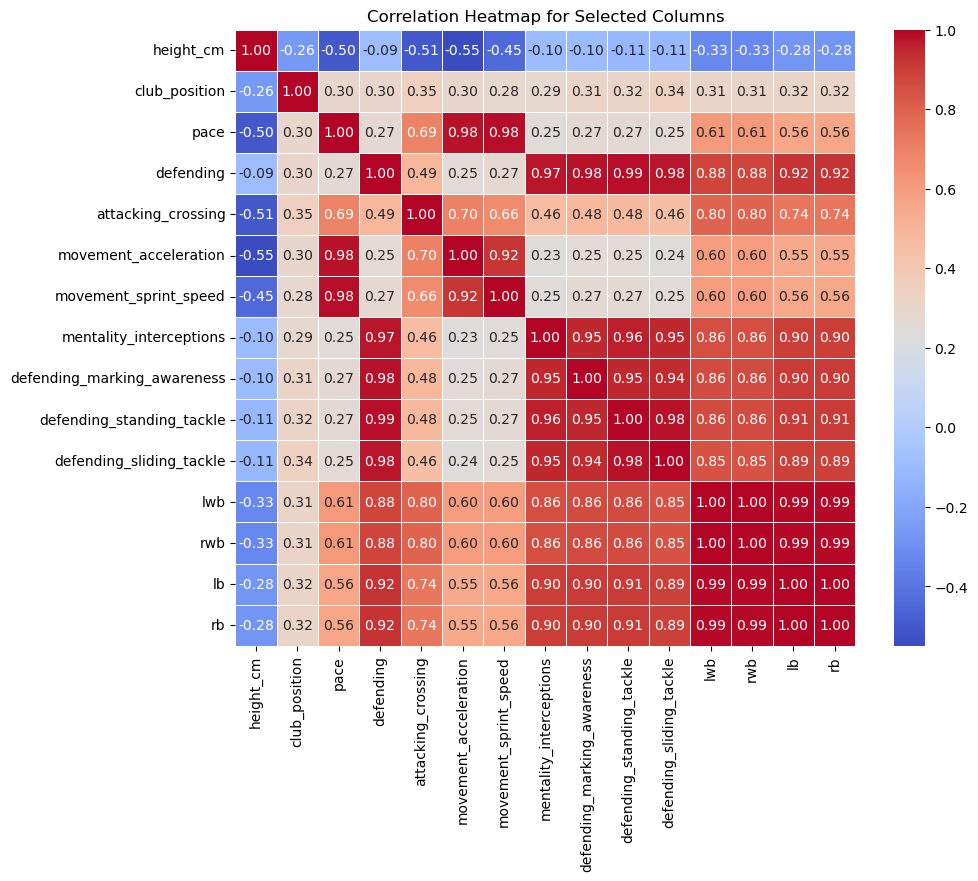

In [10]:
correlation_threshold = 0.25

correlations = df_cleaned.corr()['club_position'].abs()

selected_attributes = correlations[correlations > correlation_threshold].index.tolist()

print(f"Attributes with correlation above {correlation_threshold} with the target:")
#print(selected_attributes)

selected_df = df_cleaned[selected_attributes]

correlation_matrix_selected = selected_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap for Selected Columns")
plt.show()

### Dropping Columns Based on Domain Knowledge

In this section, we carefully consider domain knowledge to identify and drop certain columns that may not significantly contribute to our classification task.


In [11]:
drop_cols(columns = ['club_jersey_number', 'international_reputation', 
                     'nationality_id', 'club_team_id', 'body_type', 'weak_foot',
                            'preferred_foot', 'club_contract_valid_until_year', 
                     'league_level', 'league_id' , 'club_joined_date', 'release_clause_eur'])
df_cleaned

 awww to drop is ['club_jersey_number', 'international_reputation', 'nationality_id', 'club_team_id', 'body_type', 'weak_foot', 'preferred_foot', 'club_contract_valid_until_year', 'league_level', 'league_id', 'club_joined_date', 'release_clause_eur']


,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_position,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,work_rate_attacking,work_rate_defending
0,91,94,181500000.0,230000.0,24,182,75,1,5,97,90,80,92,36,78,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88,26,34,32,13,5,7,11,6,15,90,90,90,91,91,91,91,91,89,89,89,89,81,81,81,89,68,63,63,63,68,63,54,54,54,63,18,2,0
1,91,94,185000000.0,340000.0,22,195,94,1,3,89,93,66,80,45,88,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87,38,47,29,7,14,13,11,7,15,90,90,90,82,86,86,86,82,82,82,82,79,74,74,74,79,62,63,63,63,62,60,62,62,62,60,19,2,1
2,91,91,103000000.0,350000.0,32,181,75,2,4,72,88,94,87,65,78,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88,66,70,53,15,13,5,10,13,15,83,83,83,87,88,88,88,87,89,89,89,88,90,90,90,88,79,80,80,80,79,75,70,70,70,75,21,2,1
3,90,90,41000000.0,23000.0,36,169,67,3,4,80,87,90,94,33,64,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96,20,35,24,6,11,15,14,8,15,85,85,85,90,89,89,89,90,91,91,91,89,85,85,85,89,64,63,63,63,64,59,49,49,49,59,19,0,0
4,90,90,51000000.0,95000.0,35,185,81,3,4,79,88,83,87,39,78,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90,43,24,18,13,11,5,5,7,15,88,88,88,86,89,89,89,86,88,88,88,86,82,82,82,86,64,64,64,64,64,60,55,55,55,60,18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18345,47,57,100000.0,500.0,20,176,76,7,2,60,25,25,28,47,61,23,20,42,27,27,20,23,26,20,25,63,57,43,40,70,39,62,56,68,20,47,45,20,28,34,39,51,46,47,15,7,14,6,8,15,33,33,33,29,29,29,29,29,28,28,28,31,29,29,29,31,41,39,39,39,41,43,47,47,47,43,13,1,1
18346,47,55,100000.0,1000.0,21,183,74,7,2,55,28,31,33,51,47,26,25,45,32,30,26,32,26,25,31,56,55,46,45,59,36,36,56,44,23,46,50,28,38,38,46,53,52,48,8,13,9,6,7,15,35,35,35,34,34,34,34,34,33,33,33,35,35,35,35,35,44,43,43,43,44,46,47,47,47,46,13,1,1
18347,47,55,100000.0,2000.0,19,184,65,1,2,68,46,38,46,16,45,32,49,41,44,37,42,31,34,31,44,70,66,57,49,69,44,40,54,46,41,34,12,43,42,61,40,11,13,19,12,6,7,10,8,15,47,47,47,47,47,47,47,47,45,45,45,46,40,40,40,46,35,31,31,31,35,33,27,27,27,33,13,1,0
18348,47,54,90000.0,1000.0,21,178,74,2,2,57,37,46,46,38,57,36,32,42,54,36,43,34,35,50,45,59,56,60,44,67,44,48,59,60,35,50,36,53,46,40,39,35,38,45,7,7,13,12,14,15,45,45,45,46,46,46,46,46,47,47,47,47,47,47,47,47,45,45,45,45,45,45,44,44,44,45,14,1,1


In [12]:
len(['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk'])

27

In [13]:
df_cleaned['club_position'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

## Removing All Goalkeeper Rows

As part of our preprocessing efforts, we decide to exclude all rows corresponding to goalkeepers from the dataset. This decision is motivated by the recognition that goalkeepers exhibit distinct characteristics compared to outfield players.

By removing goalkeeper entries, we aim to tailor the dataset exclusively to outfield players, ensuring a more focused analysis and classification of player positions.



In [14]:
# {'ST': 1, 'CM': 2, 'CF': 3, 'GK': 4, 'LW': 5, 'CDM': 6, 'CB': 7, 'RW': 8, 'CAM': 9,
# 'RB': 10, 'RM': 11, 'LB': 12, 'LM': 13, 'LWB': 14, 'RWB': 15}

index_names_GK = df_cleaned[df_cleaned['club_position'] == 4].index ## Drop 'GK': 4 for test
df_cleaned = df_cleaned.drop(index_names_GK, inplace = False)


In [15]:
# old values = {'ST': 1, 'CM': 2, 'CF': 3, 'GK': 4, 'LW': 5, 'CDM': 6, 'CB': 7, 'RW': 8, 'CAM': 9,
# 'RB': 10, 'RM': 11, 'LB': 12, 'LM': 13, 'LWB': 14, 'RWB': 15}
# new values = {'B' : 1, 'RLB': 2, 'M' : 3, 'LRM': 4 , 'F': 5}
mapping = {
    1: 5,
    2: 3,
    3: 5,
    5: 4,
    6: 3,
    7: 1,
    8: 2,
    9: 3,
    10: 2,
    11: 4,
    12: 2,
    13: 4,
    14: 2,
    15: 2
}

# Replace values in the 'club_position' column using the mapping
df_cleaned['club_position'] = df_cleaned['club_position'].replace(mapping)


In [16]:
df_cleaned['club_position'].unique()

array([5, 3, 4, 1, 2])

## Feature  Preprocessing

In this section, we initiate the preprocessing steps by applying feature engineering techniques to enhance the dataset for better model performance.


### Creating New Features based on initial ones 

Additionally, we create new features by calculating means of highly correlated columns. This approach allows us to capture aggregated information and reduce the dimensionality of the dataset, potentially enhancing the model's ability to generalize.



In [17]:
df_cleaned['attack'] = (df_cleaned['rf'] + df_cleaned['st'] + df_cleaned['lf'] + df_cleaned['rs'] + df_cleaned['ls'] + df_cleaned['cf']) / 6


In [18]:
df_cleaned['middle'] = (df_cleaned['lw'] + df_cleaned['rcm'] + df_cleaned['lcm'] + df_cleaned['ldm'] + df_cleaned['cam'] + df_cleaned['cdm'] + \
                df_cleaned['rm'] + df_cleaned['lam'] + df_cleaned['lm'] + df_cleaned['rdm'] + df_cleaned['rw'] + df_cleaned['cm'] + df_cleaned['ram'])\
                /13

In [19]:
df_cleaned['deffence'] = (df_cleaned['rcb'] + df_cleaned['cb'] + df_cleaned['lcb'] + df_cleaned['lb'] + df_cleaned['rb'] + df_cleaned['rwb']\
                 + df_cleaned['lwb']) / 7

In [20]:
columns_to_drop = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk']

In [21]:
drop_cols(columns_to_drop)

 awww to drop is ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']


In [22]:
df_cleaned.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_position,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,work_rate_attacking,work_rate_defending,attack,middle,deffence
0,91,94,181500000.0,230000.0,24,182,75,5,5,97,90,80,92,36,78,78,94,73,86,84,93,80,69,71,92,97,97,93,93,82,90,88,88,77,83,64,38,93,83,84,88,26,34,32,13,5,7,11,6,15,2,0,90.5,81.461538,60.571429
1,91,94,185000000.0,340000.0,22,195,94,5,3,89,93,66,80,45,88,47,96,83,77,90,79,77,62,53,82,82,94,76,94,72,94,93,76,93,86,87,43,96,74,84,87,38,47,29,7,14,13,11,7,15,2,1,88.0,75.307692,61.428571
2,91,91,103000000.0,350000.0,32,181,75,3,4,72,88,94,87,65,78,95,85,55,94,83,86,92,83,94,92,72,72,74,92,78,92,72,88,74,92,75,66,88,95,83,88,66,70,53,15,13,5,10,13,15,2,1,85.5,86.692308,74.000000
3,90,90,41000000.0,23000.0,36,169,67,5,4,80,87,90,94,33,64,83,89,60,91,86,96,93,93,90,93,87,74,91,88,95,83,71,70,68,90,44,40,91,92,75,96,20,35,24,6,11,15,14,8,15,0,0,87.0,82.692308,56.142857
4,90,90,51000000.0,95000.0,35,185,81,5,4,79,88,83,87,39,78,75,91,90,89,88,87,82,73,76,91,78,79,77,92,72,87,85,82,82,81,63,39,92,90,85,90,43,24,18,13,11,5,5,7,15,1,1,88.5,80.461538,59.000000


In [23]:
df_cleaned.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'club_position', 'skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kickin

In [24]:
df_cleaned['speed_stats'] = df_cleaned['pace']
 

In [25]:
df_cleaned['shooting_stats'] = df_cleaned['shooting']

In [26]:
df_cleaned['passing_stats'] = df_cleaned['passing']

In [27]:
df_cleaned['dribbling_stats'] = df_cleaned['dribbling']


In [28]:
df_cleaned['defensive_stats'] = df_cleaned['defending']

In [29]:
df_cleaned['physical_stats'] = df_cleaned['physic']


In [30]:
columns_to_drop = ['pace', 'movement_acceleration', 'movement_sprint_speed', 'shooting','attacking_finishing', 
                   'power_long_shots', 'power_long_shots', 'mentality_positioning', 'power_shot_power',
                   'attacking_volleys', 'attacking_crossing', 'skill_curve', 'skill_fk_accuracy', 'passing',
                   'skill_long_passing', 'attacking_short_passing', 'mentality_vision' , 'movement_agility', 
                   'movement_balance', 'skill_ball_control', 'mentality_composure','skill_dribbling', 
                   'dribbling', 'movement_reactions', 'attacking_heading_accuracy', 'mentality_interceptions', 
                   'defending', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 
                  'mentality_aggression', 'power_jumping', 'power_stamina', 'power_strength', 'mentality_penalties', 'physic']






In [31]:
drop_cols(columns_to_drop)

 awww to drop is ['pace', 'movement_acceleration', 'movement_sprint_speed', 'shooting', 'attacking_finishing', 'power_long_shots', 'power_long_shots', 'mentality_positioning', 'power_shot_power', 'attacking_volleys', 'attacking_crossing', 'skill_curve', 'skill_fk_accuracy', 'passing', 'skill_long_passing', 'attacking_short_passing', 'mentality_vision', 'movement_agility', 'movement_balance', 'skill_ball_control', 'mentality_composure', 'skill_dribbling', 'dribbling', 'movement_reactions', 'attacking_heading_accuracy', 'mentality_interceptions', 'defending', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'mentality_aggression', 'power_jumping', 'power_stamina', 'power_strength', 'mentality_penalties', 'physic']


In [32]:
df_cleaned.columns

Index(['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm',
       'weight_kg', 'club_position', 'skill_moves', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed',
       'work_rate_attacking', 'work_rate_defending', 'attack', 'middle',
       'deffence', 'speed_stats', 'shooting_stats', 'passing_stats',
       'dribbling_stats', 'defensive_stats', 'physical_stats'],
      dtype='object')

## Dropping Goalkeeper Columns

In this step of preprocessing, we make drop the columns of goal keeping skills because they want affect the position of non goal keepers players.

By excluding goalkeeper-related attributes, we aim to simplify the classification task and improve the focus on differentiating player positions.


In [33]:
columns_to_drop = ['goalkeeping_diving', 'goalkeeping_handling',
       'goalkeeping_kicking', 'goalkeeping_positioning',
       'goalkeeping_reflexes', 'goalkeeping_speed']

In [34]:
drop_cols(columns_to_drop)

 awww to drop is ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']


In [35]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16305 entries, 0 to 18349
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   overall              16305 non-null  int64  
 1   potential            16305 non-null  int64  
 2   value_eur            16305 non-null  float64
 3   wage_eur             16305 non-null  float64
 4   age                  16305 non-null  int64  
 5   height_cm            16305 non-null  int64  
 6   weight_kg            16305 non-null  int64  
 7   club_position        16305 non-null  int64  
 8   skill_moves          16305 non-null  int64  
 9   work_rate_attacking  16305 non-null  int64  
 10  work_rate_defending  16305 non-null  int64  
 11  attack               16305 non-null  float64
 12  middle               16305 non-null  float64
 13  deffence             16305 non-null  float64
 14  speed_stats          16305 non-null  int64  
 15  shooting_stats       16305 non-null  int6



overall                0.001383
potential              0.022858
value_eur              0.029662
wage_eur               0.016911
age                    0.055342
height_cm              0.202569
weight_kg              0.157884
club_position          1.000000
skill_moves            0.394769
work_rate_attacking    0.253212
work_rate_defending    0.275930
attack                 0.564778
middle                 0.181675
deffence               0.585448
speed_stats            0.289799
shooting_stats         0.691346
passing_stats          0.196964
dribbling_stats        0.437814
defensive_stats        0.728085
physical_stats         0.243080
Name: club_position, dtype: float64


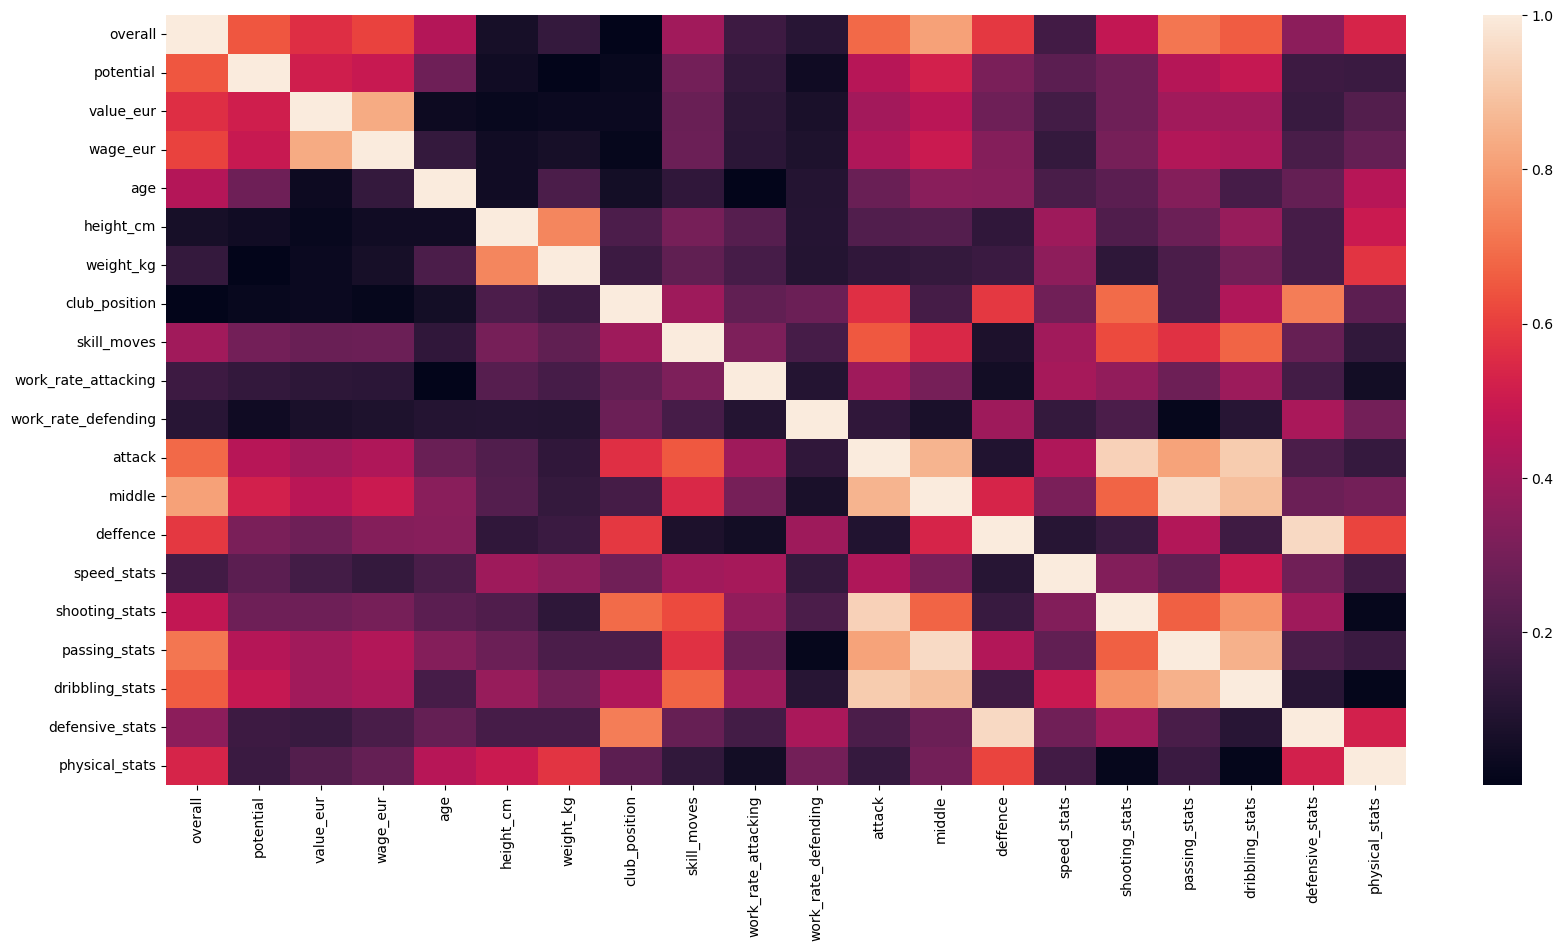

In [36]:
### Correlation Matrix - Made into a comment after no longer needed to run ###
corr_matrix = df_cleaned.corr().abs()
corr_matrix
print('\n')
print((corr_matrix['club_position']))

plt.figure(figsize=(20,10))
ax = sns.heatmap(corr_matrix)
plt.show()



In [37]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16305 entries, 0 to 18349
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   overall              16305 non-null  int64  
 1   potential            16305 non-null  int64  
 2   value_eur            16305 non-null  float64
 3   wage_eur             16305 non-null  float64
 4   age                  16305 non-null  int64  
 5   height_cm            16305 non-null  int64  
 6   weight_kg            16305 non-null  int64  
 7   club_position        16305 non-null  int64  
 8   skill_moves          16305 non-null  int64  
 9   work_rate_attacking  16305 non-null  int64  
 10  work_rate_defending  16305 non-null  int64  
 11  attack               16305 non-null  float64
 12  middle               16305 non-null  float64
 13  deffence             16305 non-null  float64
 14  speed_stats          16305 non-null  int64  
 15  shooting_stats       16305 non-null  int6

## Model Evaluation

In this section, we delve into the modeling phase where we employ six different classification models to predict players' positions. The chosen models are as follows:

- DecisionTreeClassifier
- RandomForestClassifier
- GaussianNB
- KNeighborsClassifier
- LogisticRegression
- XGBoost

### Model Training and Evaluation

We train each model on the preprocessed dataset and assess their performance using the classification report. The classification report provides detailed metrics such as precision, recall, and F1-score for each class, offering a comprehensive view of the models' predictive capabilities.

In [38]:
import warnings
warnings.filterwarnings('always')

In [39]:
target = 'club_position'

X = df_cleaned.drop(target, axis=1)

y = df_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [40]:
classifiers = []

model1 = tree.DecisionTreeClassifier()
classifiers.append(model1)

model2 = RandomForestClassifier()
classifiers.append(model2)

model3= naive_bayes.GaussianNB()
classifiers.append(model3)

model4 = KNeighborsClassifier(n_neighbors=16) #Based on Error Rate K value
classifiers.append(model4)

model5 = LogisticRegression(solver='lbfgs', max_iter=1000)
classifiers.append(model5)



In [41]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [42]:
df_cleaned[target].unique()

array([5, 3, 4, 1, 2])

In [43]:
results = []

In [44]:
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accu = accuracy_score(y_test, y_pred)
    results.append((clf, accu))
    print('The Accuracy of %s is %s' %(clf,accu))
    conmat = confusion_matrix(y_test, y_pred)
    #print('The Confusion Matrix of %s is %s\n' %(clf,conmat))
    target_names = ['class 1', 'class 2', 'class 3',  'class 4', 'class 5']

    print(classification_report(y_test, y_pred, target_names=target_names))



The Accuracy of DecisionTreeClassifier() is 0.6767862618828581
              precision    recall  f1-score   support

     class 1       0.76      0.81      0.79       595
     class 2       0.58      0.60      0.59       666
     class 3       0.70      0.67      0.68      1021
     class 4       0.52      0.50      0.51       446
     class 5       0.80      0.79      0.79       533

    accuracy                           0.68      3261
   macro avg       0.67      0.67      0.67      3261
weighted avg       0.68      0.68      0.68      3261

The Accuracy of RandomForestClassifier() is 0.7877951548604722
              precision    recall  f1-score   support

     class 1       0.85      0.90      0.87       595
     class 2       0.80      0.66      0.72       666
     class 3       0.78      0.83      0.80      1021
     class 4       0.63      0.64      0.64       446
     class 5       0.85      0.86      0.86       533

    accuracy                           0.79      3261
   ma

In [45]:
# Assuming y_train and y_test contain your target variables
y_train_adjusted = y_train - 1  # Subtract 1 to start classes from 0
y_test_adjusted = y_test - 1    # Subtract 1 to start classes from 0

model6 = XGBClassifier(
    learning_rate=0.3,
    n_estimators=500,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    min_child_weight=1,
    reg_alpha=0.1,
    reg_lambda=1,
    booster='gbtree',  # 'gbtree' is the default booster
    random_state=42)
classifiers.append(model6)
model6.fit(X_train, y_train_adjusted)
y_pred = model6.predict(X_test)
accu = accuracy_score(y_test_adjusted, y_pred)
results.append(("Xgboost", accu))
print('The Accuracy of %s is %s' % ("XgBoost", accu))


The Accuracy of XgBoost is 0.8160073597056118


## Model Accuracy Comparison
In this section, we visually compare the accuracies of various classification models used in our analysis. The bar plot below illustrates the performance of each model in predicting player positions.


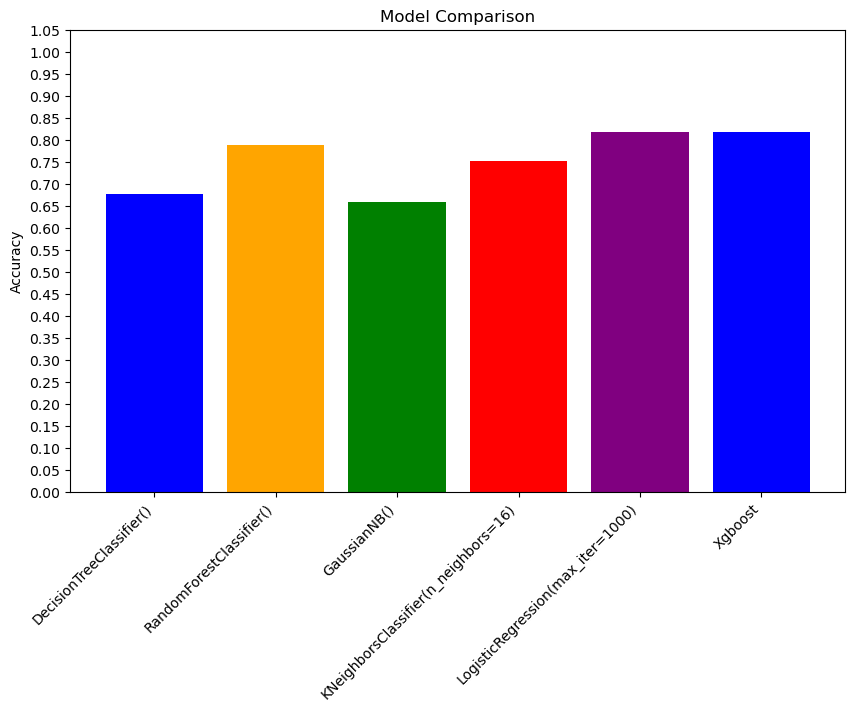

In [46]:
# Plotting the results
classifiers_names, accuracies = zip(*results)

plt.figure(figsize=(10, 6))
plt.bar([str(name) for name in classifiers_names], accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.yticks(np.arange(0, 1.1, 0.05))
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


## K-Nearest Neighbors (KNN) - Error Rate Analysis

In this section, we explore the performance of the K-Nearest Neighbors (KNN) algorithm by calculating error rates for different values of K. The goal is to identify the most suitable K value that minimizes the error in predicting player positions.


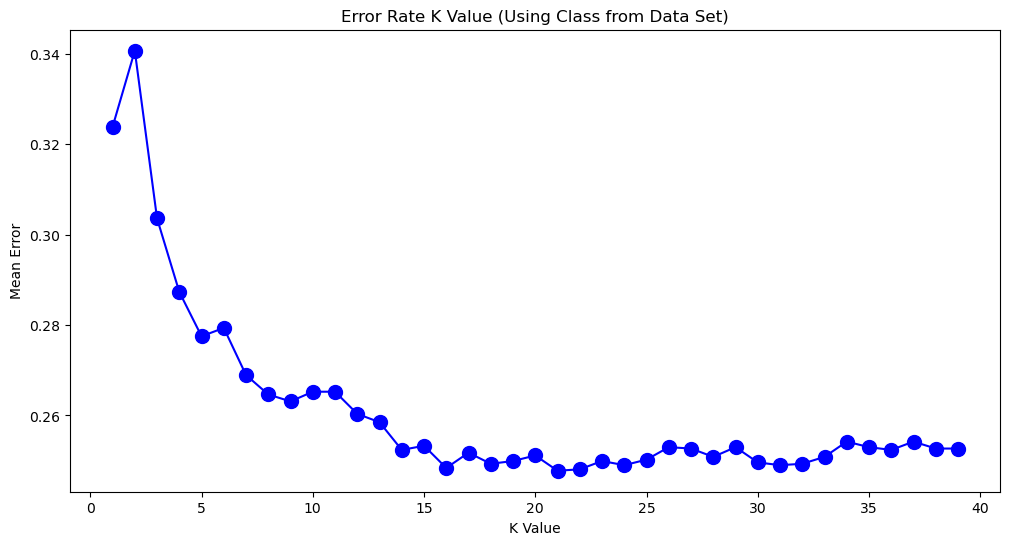

In [47]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='blue', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value (Using Class from Data Set)')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

## Conclusion

In conclusion, our analysis aimed to classify players into 5 distinct positions. After exploring various classification models, it is evident that the Logistic Regression and XGBoost models outperformed others, showcasing the highest accuracy in predicting player positions.

Key Features:
- **Attack:** 0.564778
- **Defense:** 0.585448
- **Shooting Stats:** 0.691346
- **Defensive Stats:** 0.728085

These features exhibited the strongest correlation with the target variable, contributing significantly to the accurate classification of player positions.

The results suggest that with the chosen features and models, we can effectively classify players into their respective positions. However, further exploration and fine-tuning of features and hyperparameters may lead to even more precise predictions.

This analysis provides valuable insights into the influential factors for player position classification and serves as a foundation for future enhancements in the modeling approach.
